# Lab 8: Image Segmentation and Hough Transform

#### 1. Image Segmentation
Image segmentation is the process of partitioning an image into multiple segments, often to simplify or change the representation of an image into something that is more meaningful and easier to analyze. The goal of segmentation is to identify objects or boundaries in images.

Common techniques for image segmentation include:
- **Thresholding**: Simple segmentation method where pixels are divided into two classes based on intensity values.
- **Edge-based segmentation**: Detects the boundaries of objects.
- **Region-based segmentation**: Groups together pixels with similar characteristics.

**Thresholding Equation**:

$$
\text{Segmented Image} = 
\begin{cases} 
1, & \text{if } f(x,y) > T \\
0, & \text{if } f(x,y) \leq T
\end{cases}
$$

Where:
- f(x,y) is the intensity of the pixel at position (x, y) ,
- T  is a threshold value.

#### 2. Hough Transform
The Hough Transform is a feature extraction technique used to detect simple shapes, primarily lines and circles, in an image. It works by transforming points in the image space to a parameter space (Hough space). The most common application is detecting straight lines.

The equation of a straight line in polar coordinates is given by:

$$
r = x \cos(\theta) + y \sin(\theta)
$$

Where:
- r  is the distance from the origin to the line,
- $ \theta $ is the angle of the line,
-  (x, y) are the coordinates of a point on the line.

The Hough Transform maps each point in the image space to a sinusoidal curve in the Hough space. The intersection of multiple curves corresponds to the parameters of a detected line.

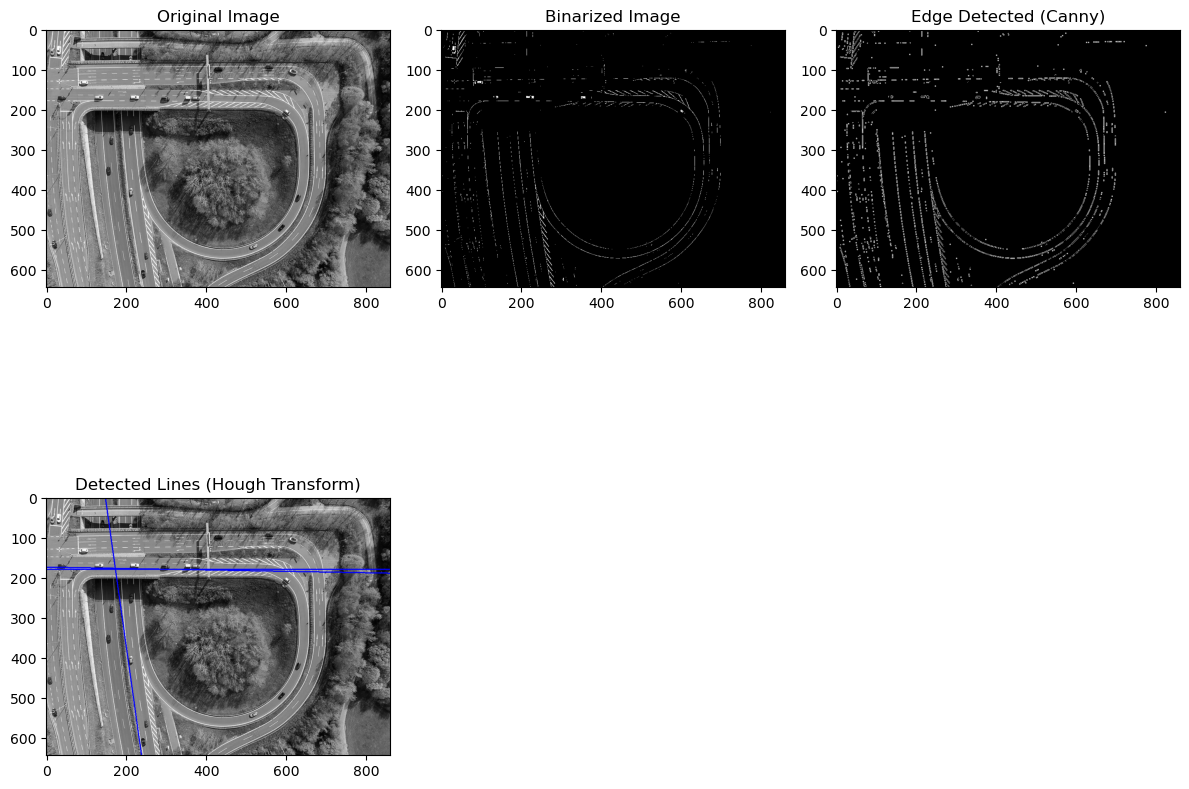

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('image.jpeg', 0) 


_, binarized_img = cv2.threshold(img, 240, 255, cv2.THRESH_BINARY)


edges = cv2.Canny(binarized_img, 50, 150)


lines = cv2.HoughLines(edges, 1, np.pi / 180, 150) 

output_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(output_img, (x1, y1), (x2, y2), (0, 0, 255), 2)  


plt.figure(figsize=(12, 10))

plt.subplot(231), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.subplot(232), plt.imshow(binarized_img, cmap='gray'), plt.title('Binarized Image')
plt.subplot(233), plt.imshow(edges, cmap='gray'), plt.title('Edge Detected (Canny)')
plt.subplot(234), plt.imshow(output_img), plt.title('Detected Lines (Hough Transform)')

plt.tight_layout()
plt.show()

